<a href="https://colab.research.google.com/github/eovallemagallanes/pattern-recognition/blob/main/Mahalanobis_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mahalanobis distance**



In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
def mahalanobis(x_0=None, X=None, cov=None):
    x_mu = x_0 - np.mean(X)
    if not cov:
        cov = np.cov(X.T)
    inv_cov = np.linalg.inv(cov)
    mahal = x_mu @ inv_cov @ x_mu.T

    return mahal

## 2D Data

Test point:  [[ 2.63544448 -4.37007779]]
Distances:  [[[37.26363225 14.79718496]]]
Predicted Class:  1


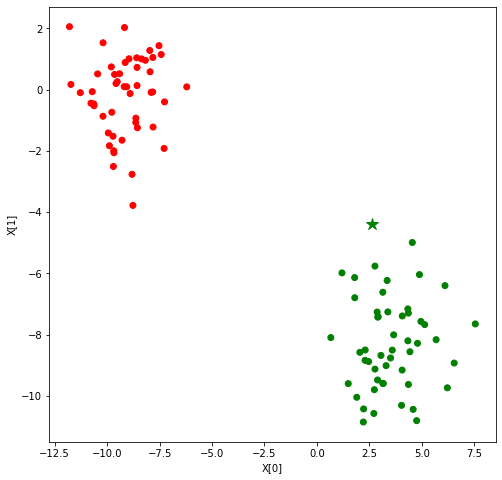

In [69]:
# gen data
centers = 2
X, y = make_blobs(n_samples = 100, 
                  centers = centers,
                  n_features = 2,
                  cluster_std= 1.5)


# gen test data
x_0 = np.random.uniform(-10,10,(1,2))
print('Test point: ', x_0)

# get mahalanobis distance
Xs = [X[np.where(y==i)] for i in range(centers)]
m_dist = np.array([mahalanobis(x_0, Xi) for Xi in Xs])

# get class (min distance)
print('Distances: ', m_dist.T)
y_pred = np.argmin(m_dist)
print('Predicted Class: ', y_pred)


# plot
fig = plt.figure(figsize=(8,8))
rgb = np.array(['r', 'g', 'b'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[y])
plt.plot(x_0[0, 0], x_0[0, 1], '*', color=rgb[y_pred], markersize=12)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.show()

## 3D Data

Test point:  [[7.3402853  4.02032918 9.72635666]]
Distances:  [[[507.49569777 132.2117351   26.69722788]]]
Predicted Class:  2


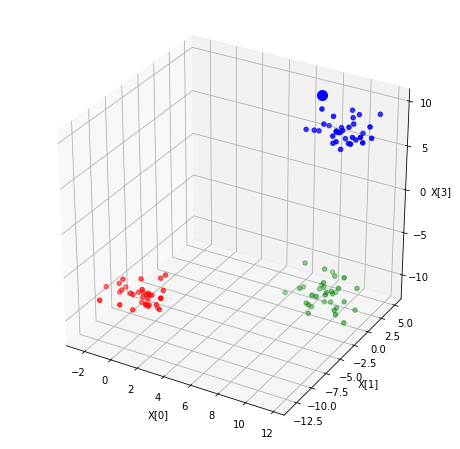

In [56]:
centers = 3
X, y = make_blobs(n_samples = 100, 
                  centers = centers,
                  n_features = 3)

# gen test data
x_0 = np.random.uniform(-10,10,(1,3))
print('Test point: ', x_0)

# get mahalanobis distance
Xs = [X[np.where(y==i)] for i in range(centers)]
m_dist = np.array([mahalanobis(x_0, Xi) for Xi in Xs])

# get class (min distance)
print('Distances: ', m_dist.T)
y_pred = np.argmin(m_dist)
print('Predicted Class: ', y_pred)

rgb = np.array(['r', 'g', 'b'])

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], color=rgb[y])
ax.scatter3D(*x_0.T, color=rgb[y_pred], s=100)
ax.set_xlabel('X[0]')
ax.set_ylabel('X[1]')
ax.set_zlabel('X[3]')
plt.show()